### Importing Libraries

In [1]:
# General Libraries 
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats

# Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import plotly.express as px
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# sklearn algorithm libraries 
# Metrics and cluster libraries 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

# Chart style
sns.set(style='whitegrid')
facecolor = '#eaeaea'
font_color = '#424242'
csfont = {'fontname': 'DejaVu Serif'}
hfont = {'fontname': 'DejaVu Sans'}

In [3]:
# Importing Data
df = pd.read_csv(r"gym_churn_us.csv")

### Data understanding

In [6]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [10]:
# Lowercasing column names
df.columns = df.columns.str.lower()

### EDA

In [13]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Insights**:
1. Longest membership periods is 6 and 12 months.
2. Average membership period is 4 months and most of members i.e. 75% leave after 6 months.
3. The most number of classes attended by members is 6.
4. On average 1.8 classes and 75% of members attend 2.5 classes per month, the standard deviation is of 0.97 i.e. members either attend 0 or 2 classes.
5. Average additional charges paid by members is $147 dollars. 

In [16]:
# Statistical difference in attributes of members between the ones who churned and who didn't
df.groupby('churn')[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
                     'avg_class_frequency_current_month']].mean()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Insights**:
1. Churned members had stayed for less than 2 months, but the lifetime on average is 0.99 i.e. they stay for less than a month.
2. The average additional charges of churned and not churned member is merely $48 i.e. merely 27% difference. This indicated that members still use the additional services even though they leave early.
3. It was seen that that the not churned customer's contract period was 5.7 and lifetime was 4.7 i.e. very few members stay for longer than 6 months. In fact, 75% of the members have 6 months contract period and lifetime of 5 months.

### Univariate Analysis

In [19]:
columns_to_plot = ['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
                   'avg_class_frequency_current_month']

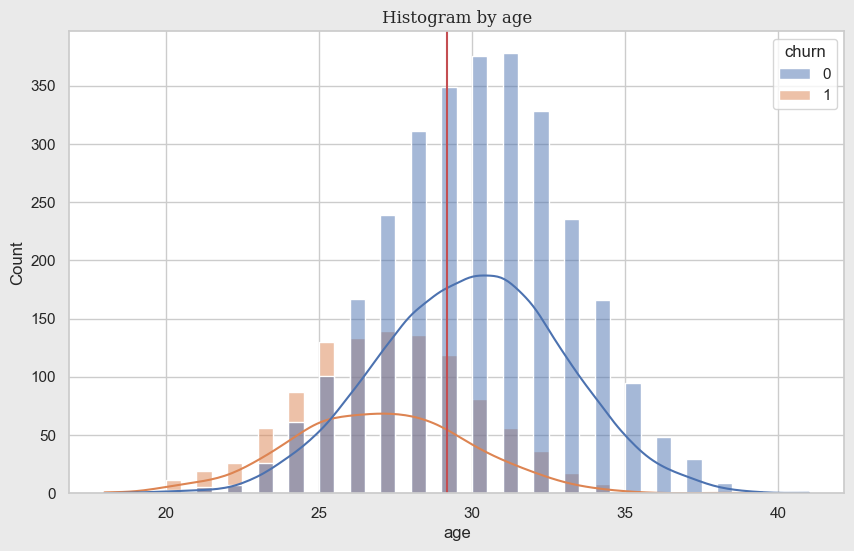

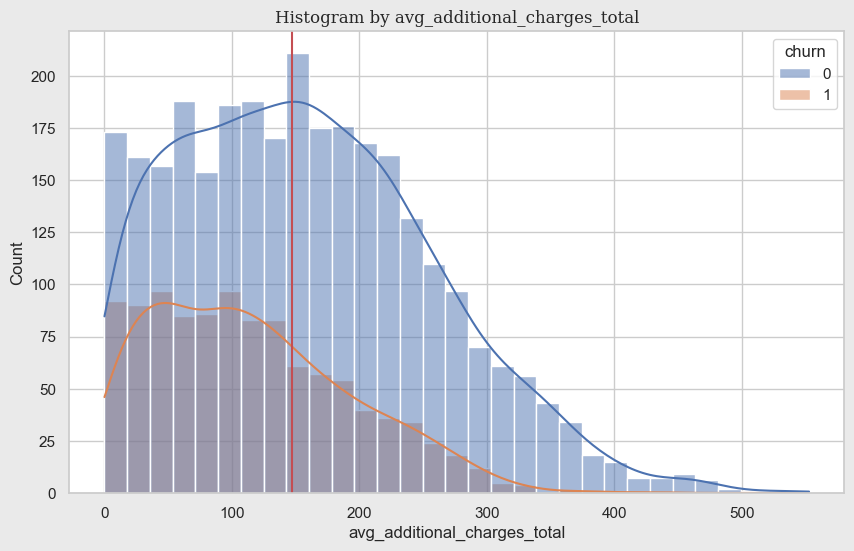

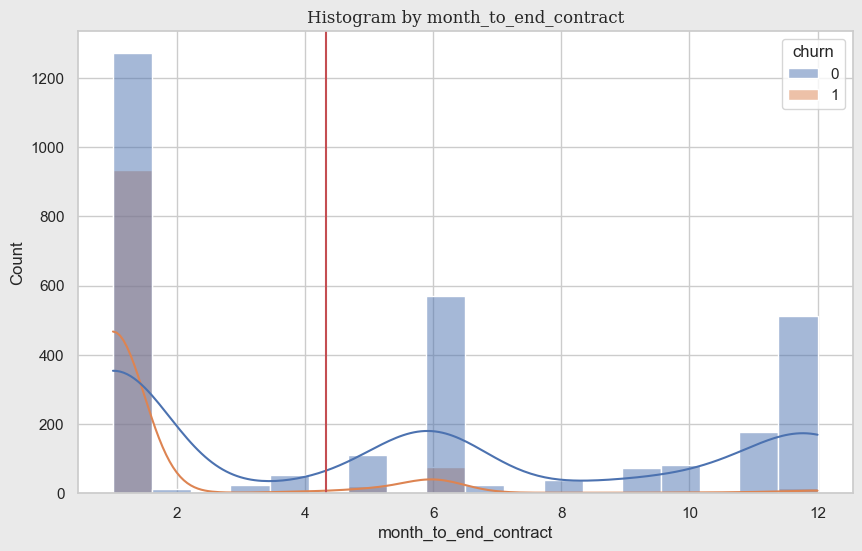

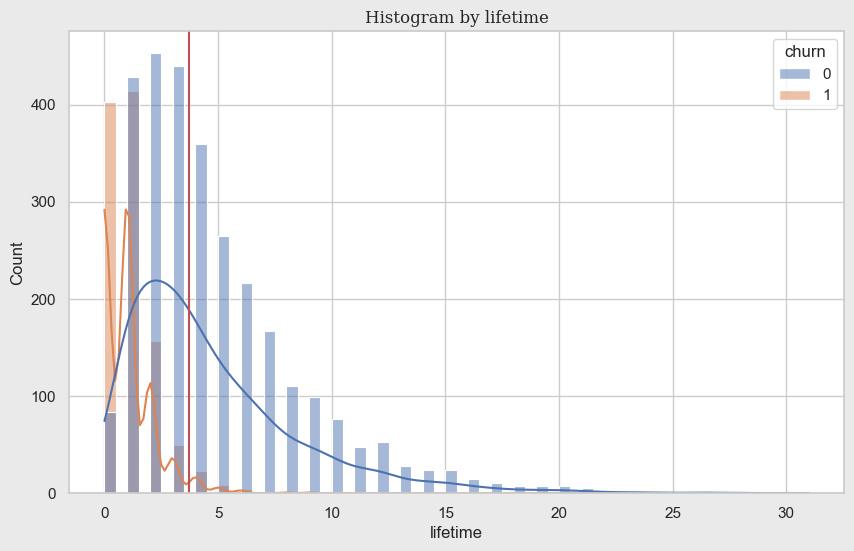

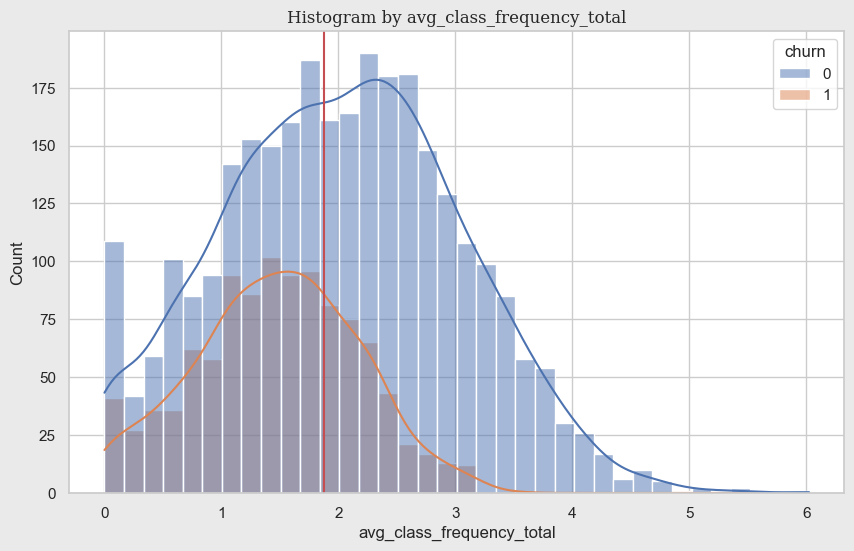

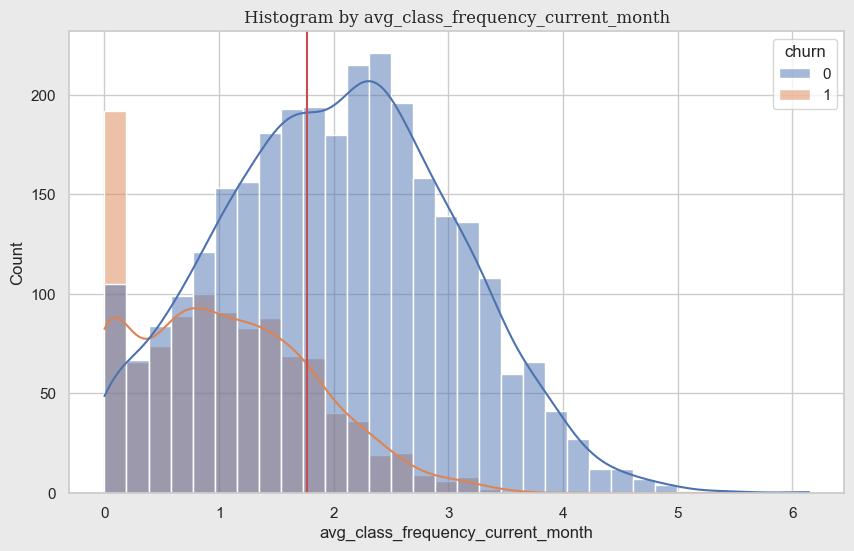

In [21]:
# Function to loop through required columns for univariate analyis to create histograms
for col in columns_to_plot:
    mean = df[col].mean()
    fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
    sns.histplot(data=df, x=col, hue='churn', kde=True, ax=ax)
    plt.axvline(mean, color='r', linestyle='-', linewidth=1.5)
    title = f'Histogram by {col}'
    ax.set_title(title, **csfont)
    plt.show()

**Insights**:

1. **Distribution by Age:** Normal Distiribution across both groups.
   - The frequancy of churned members is significantly lower than those who haven't churned.
   - The churned members are mostly between 25 and 30 years old, compared to the non-churned members who have the highest frequancy between 30 and 33.
2. **Distribution by Additional Charges:** Positive right skewed Distribution.
   - Both groups have right-skewed distributions suggesting that additional fees per month remains relativey low or below 200 USD. The median is around 136 USD.
   - The non-churned members have a higher spend which is likely due to the longer contract terms and members lifetime.
3. **Distribution by Month till Contract End:** Unconventional Distribution.
   - Across both groups, the highest frequancy of members have 1 month remaining on their contract.
   - The other 2 groups are members who have 6 months remaining and 12 months remaining.
   - There is lower frequancy for other timeframes and the median is 5 months.
4. **Distribution by members Lifetime:** Right skewed Distribution.
   - churned members have a lifetime less than 5 months.
   - Non-churned members have a lifetime that streches beyond 20 months, however the highest frequancy still below 5 months.
5. **Distribution by Number of Classes:** All time total
   - No more than 6 classes are taken all the way through a membership period.
   - The distributions follow the same right-skewed pattern and as expected non-churned members are the ones who are taking more than 2.
   - Chuners who have lower contracts quite clearer take less classes for the whole contract.
6. **Distribution by Number of Classes:** Current month total
   - In contrast, to the above the the majority of members did not take a single class in the current month.
   - The non-churned members on the other hand will take at least 2 classes per month according to our histogram.

### Bivariate Analysis

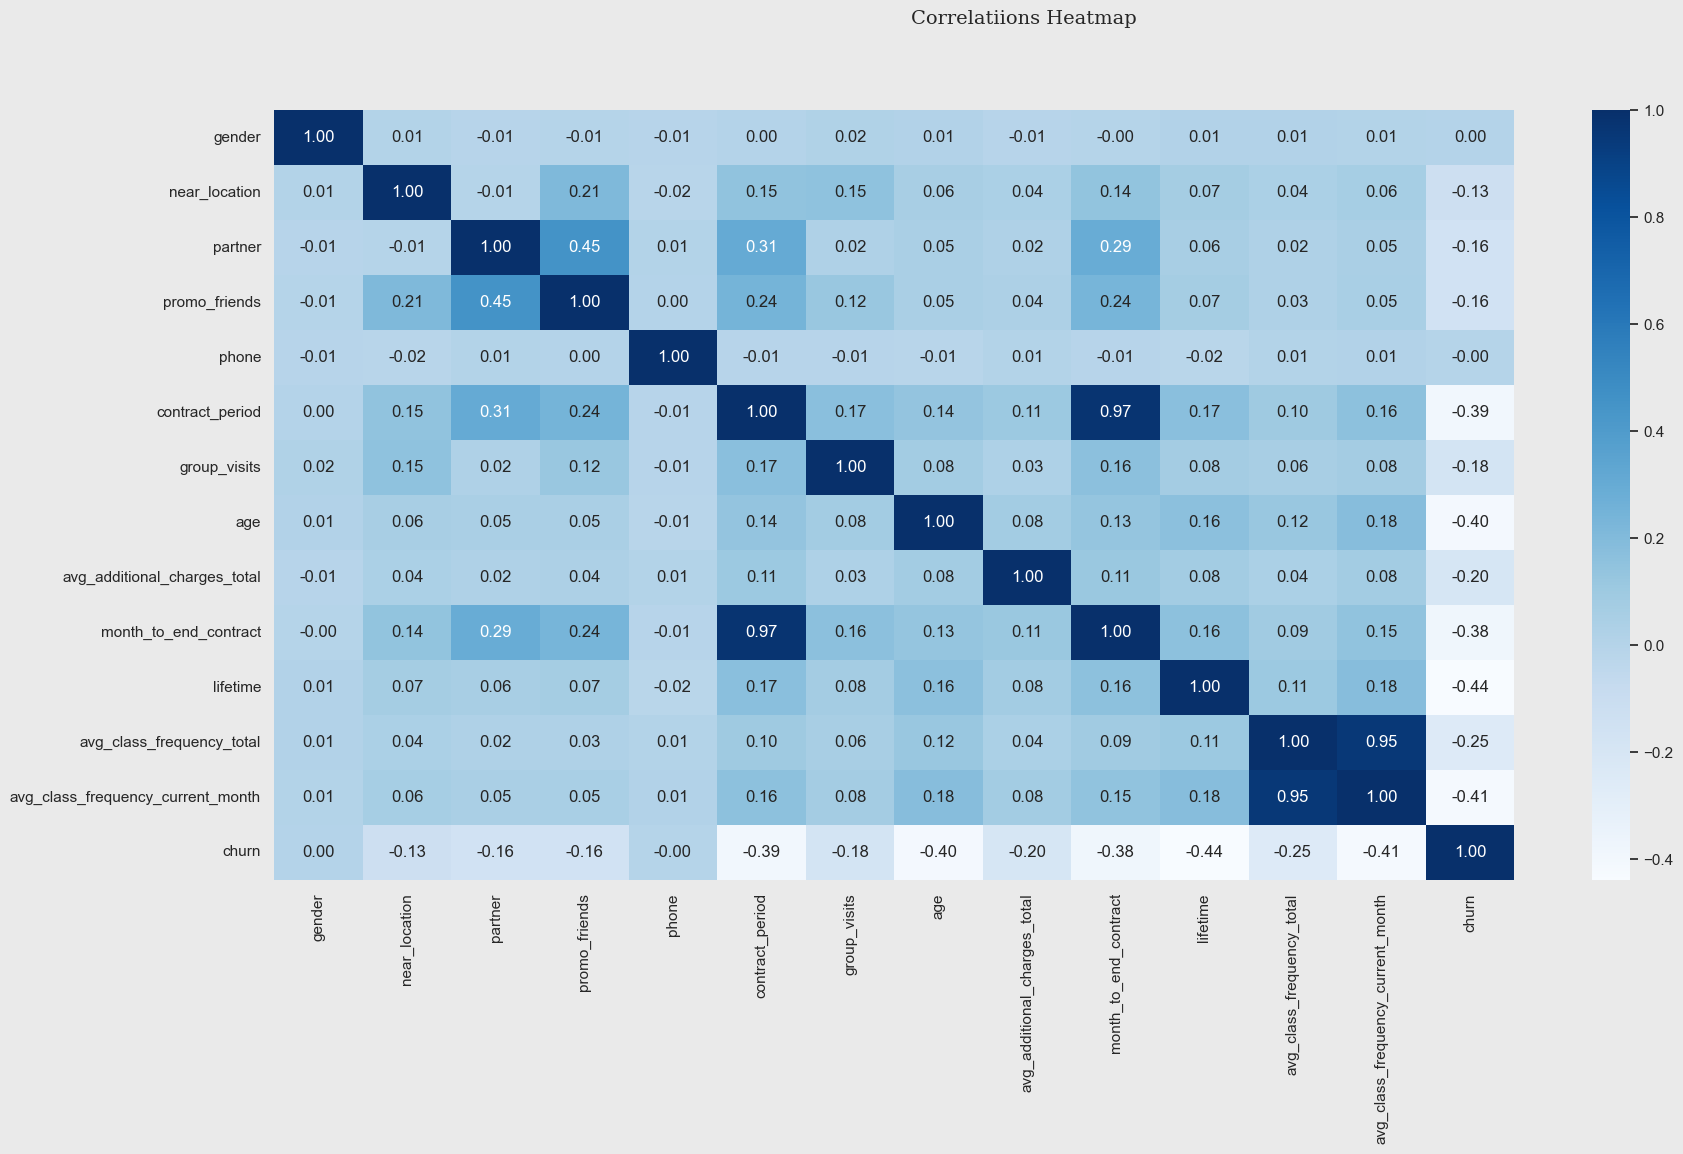

In [24]:
# Finding relationship between different features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10), facecolor=facecolor)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
title = 'Correlatiions Heatmap'
fig.suptitle(title, fontsize=14, **csfont)
plt.show()

In [26]:
corr_matrix['churn'].sort_values()

lifetime                            -0.438220
avg_class_frequency_current_month   -0.412348
age                                 -0.404735
contract_period                     -0.389984
month_to_end_contract               -0.381393
avg_class_frequency_total           -0.249715
avg_additional_charges_total        -0.198697
group_visits                        -0.175325
promo_friends                       -0.162233
partner                             -0.157986
near_location                       -0.128098
phone                               -0.001177
gender                               0.000708
churn                                1.000000
Name: churn, dtype: float64

**Insights from bivariate analysis:**
The lifetime has the highest negative correlation, followed by the average class in the current and the age of the members. Furthermore, suggesting that members who are less active amd based on distributions, younger than 30 are more likely to churn. 
The key contributers to the churn are:
1. Age
2. Lifetime
3. Contract period
4. Average class frequency

Positive correlation include:
1. Friend promotions
2. Partners, employees or friends of employee

**Insights from EDA:** Following hypothesis will be used to test and create a model that weill help in undeerstanding the members and then create the membership retention strategy.

Hypothesis 1:

- H0 members under the age of 35 tend to leave the gym at least 2 months after joining the company.

- H1 members over 35 tend to be more active compared to our younger members.

Hypothesis 2:

- H0 members will stay for longer in the gym if they are able to attend more classes.

- H1 members who don't attend classes at least once a month will more likely churn.

Hypothesis 3:

- H0 members who sign up for a period longer than 6 months are less likely to churn than monthly members.

- H1 Monthly members are more likely to churn than 12-month members.

### Model Building 

#### Feature Selection
Based on the hypothesis

In [32]:
x = df[['lifetime','avg_class_frequency_current_month','age','contract_period', 'avg_class_frequency_total','avg_additional_charges_total', 
        'month_to_end_contract']]
y = df['churn']

In [34]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [36]:
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(x_test)

In [38]:
regression_model = LogisticRegression(max_iter=3000)
regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [42]:
# Using trained model to make forecasts
probabilities = regression_model.predict_proba(x_test)[:,1]

# Binary prediction
predictions = regression_model.predict(x_test)

In [44]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.78
F1: 0.83


In [46]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_sd, y_train)

# Using trained model to make predictions
rf_predictions = rf_model.predict(X_test_sd)
rf_probabilities = rf_model.predict_proba(X_test_sd)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.91
Precision: 0.85
Recall: 0.79
F1: 0.82


In [48]:
model = [RandomForestRegressor(),LogisticRegression()]

In [50]:
# Creating function to take model and data as input and output metrics
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    year_error_abs = [abs(i) for i in y_error]
    abs_error_pct = year_error_abs/y_true
    return (abs_error_pct.sum())/len(y_true)

In [52]:
# Creating function to display the results
def predictions(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), 
                                                                mape(y_test, y_pred), r2_score(y_test, y_pred)))

In [54]:
# Printing the results
for i in model:
    print(i)
    predictions(m=i, X_train=X_train_sd, X_test=X_test_sd, y_train=y_train, y_test=y_test)

RandomForestRegressor()
MAE:0.25 MSE:0.24 MAPE:inf R2:-0.26 
LogisticRegression()
MAE:0.25 MSE:0.25 MAPE:0.25 R2:-0.34 


C:\Users\ANJALI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\ANJALI\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Model Results

The evaluation of the models, Random Forest and Logisitic Regression provided significant performance insights.

Random Forest Classifier:

- Accuracy: 0.87
- Precision: 0.85
- Recall: 0.86
- F1 Score: 0.85

Logistic Regression:

- Accuracy: 0.90
- Precision: 0.88
- Recall: 0.88
- F1 Score: 0.88

Both the models demonstrate high levels of accuracy and balance between precision and recall. The Logistic Regression model has a slightly higher accuracy and precision compared to Random Forest and the F1 score is particularly pleasing indicating a robust balance between precision and recall.

Focusing on these classification metrics such as precision, recall and the F1 score since they provide a more relevant assessment for the churn predication. These metrics offer a nuanced understanding of the models' abilities to correctly classify instances of churn and minimize false positives or false negatives.

Therefore, while both models exhibit strong performance, the Logistic Regression model appears to have a slight edge in accuracy and precision.

### User Clusters

In [59]:
# Standardising the feature data
sc = StandardScaler()
x_sc = sc.fit_transform(df)

In [61]:
# Building the distance matrix of standardised features
linked_data = linkage(x_sc, method='ward')

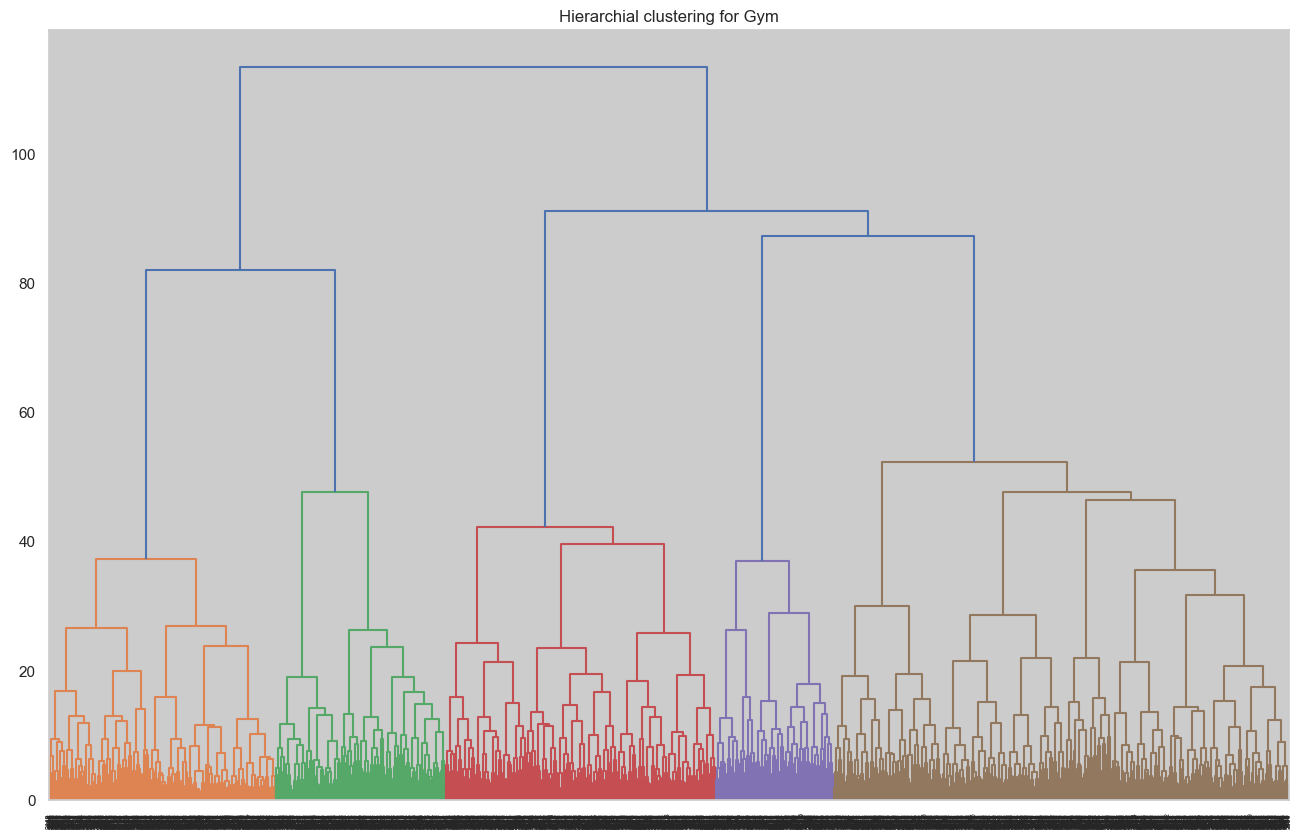

In [63]:
plt.figure(figsize=(16,10))
dendrogram(linked_data, orientation='top')
plt.title('Hierarchial clustering for Gym')
plt.xticks(rotation=90)
plt.show()

In [64]:
# Definig K-means model with 5 clusters 
km = KMeans(n_clusters=5, random_state=42)

In [65]:
# Predicting the clusters for the observations
labels = km.fit_predict(x_sc)

In [66]:
# Storing the cluster labels to df
df['cluster_km'] = labels

In [67]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,4


In [75]:
# Comparing different clusters
df.groupby('cluster_km')[['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'group_visits', 'age', 
                     'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
                     'avg_class_frequency_current_month', 'churn']].mean()

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,
0,0.508475,1.000000,0.332464,0.226858,1.646675,0.285528,26.915254,114.995594,1.594524,1.061278,1.402755,1.007382,0.932203
1,0.499033,0.000000,0.462282,0.077369,2.292070,0.216634,28.564797,136.165668,2.160542,2.843327,1.732190,1.554870,0.433269
2,0.506399,0.956124,0.786106,0.574954,10.628885,0.546618,29.887569,159.938050,9.675503,4.621572,2.007334,2.001950,0.013711
3,0.523316,0.862694,0.471503,0.305699,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.515372,0.999191,0.332524,0.220874,2.269417,0.449029,30.193366,160.630304,2.137540,4.885113,2.130157,2.132761,0.003236


### Distribution by Clusters

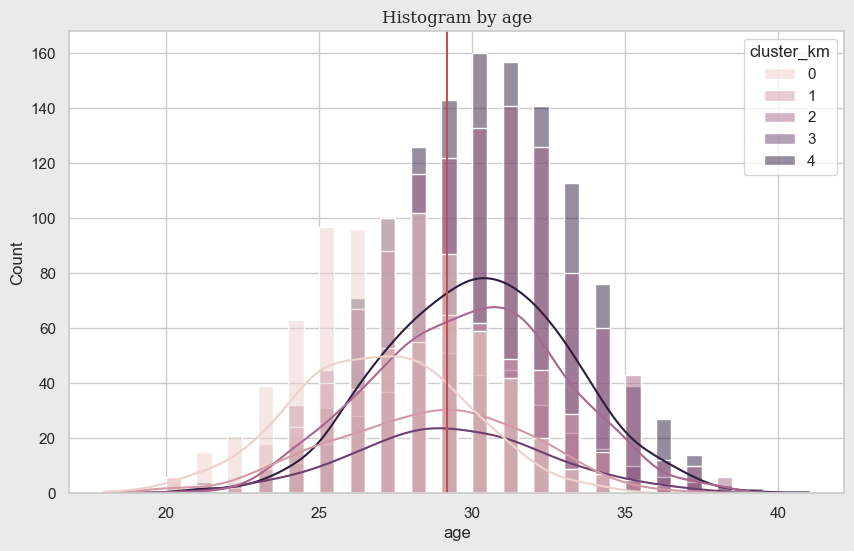

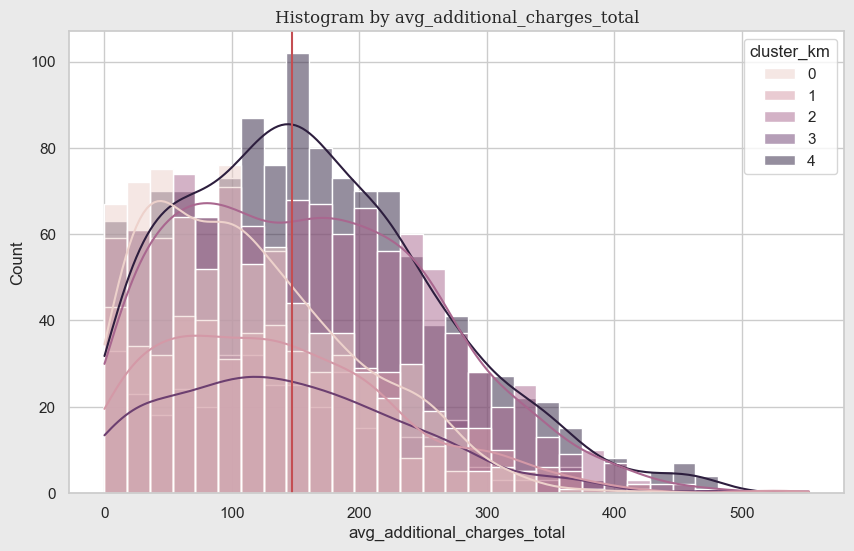

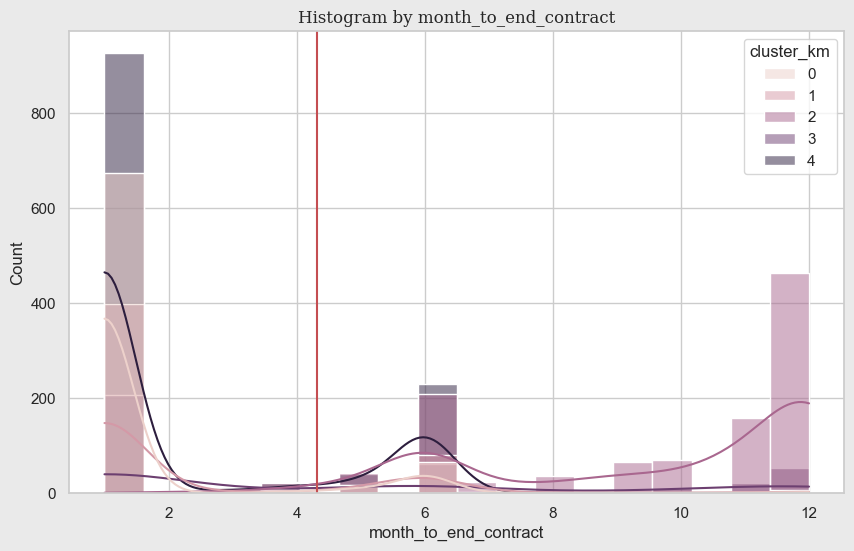

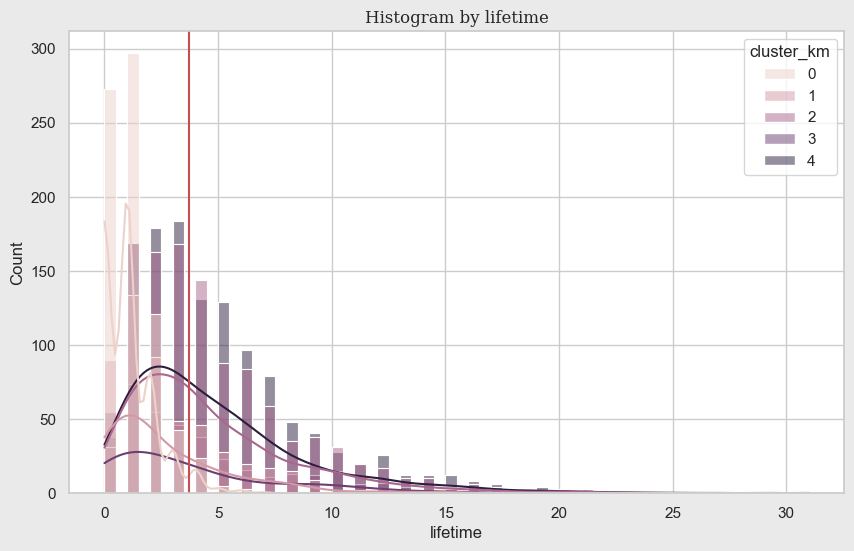

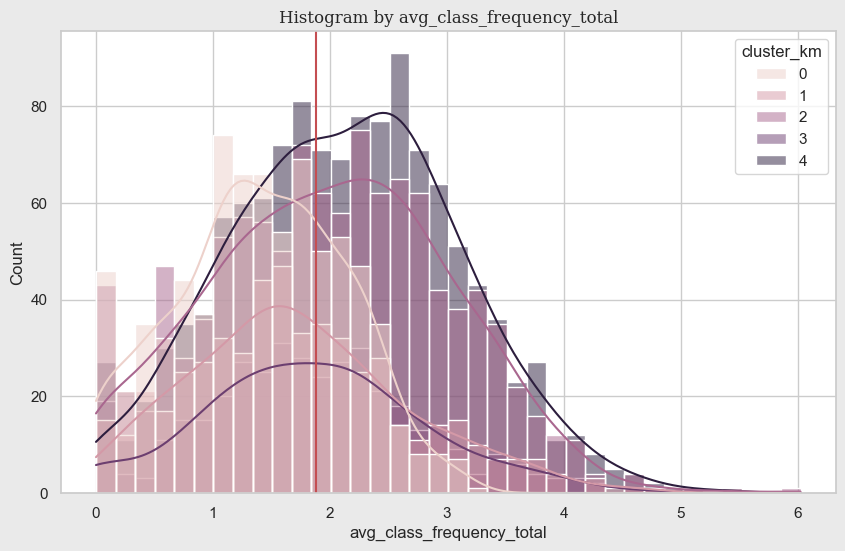

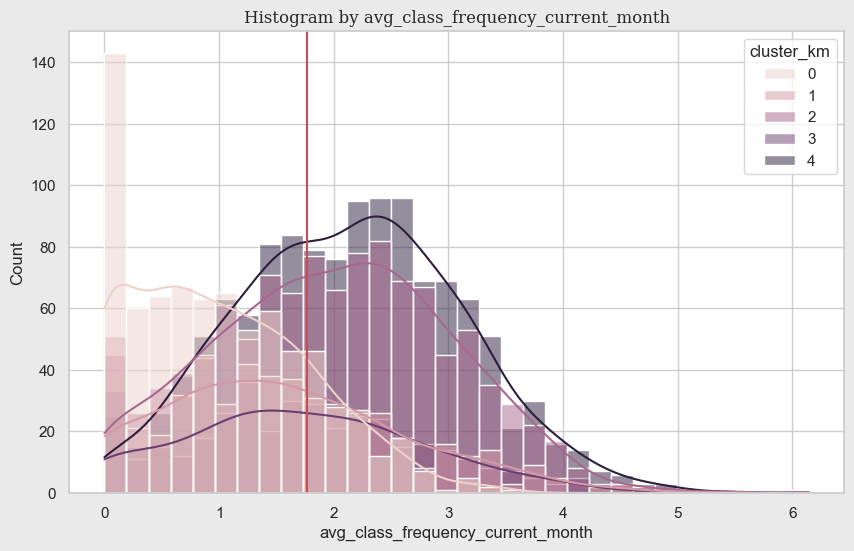

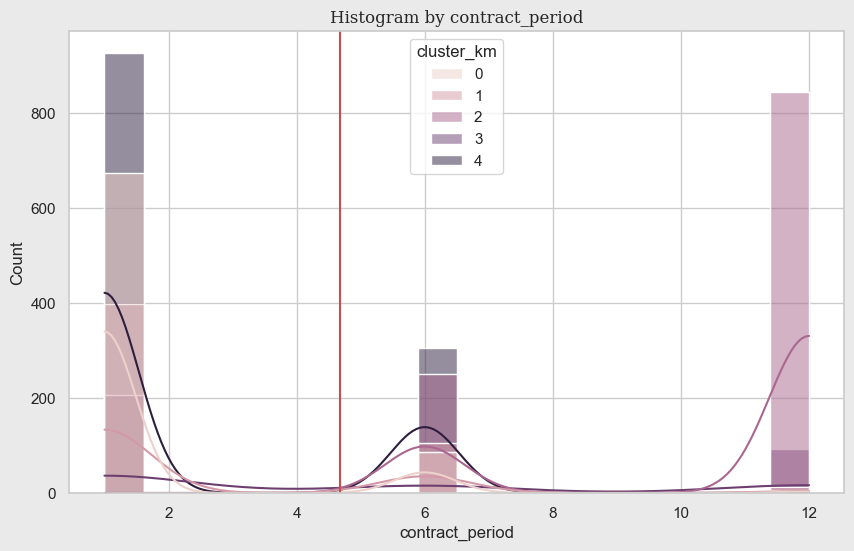

In [78]:
columns_to_plot_clusters=['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                 'avg_class_frequency_total', 'avg_class_frequency_current_month','contract_period']

for col in columns_to_plot_clusters:
    mean = df[col].mean()
    fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
    sns.histplot(data=df, x=col, hue='cluster_km', kde=True, ax=ax)
    plt.axvline(mean, color='r', linestyle='-', linewidth=1.5)
    title = f'Histogram by {col}'
    ax.set_title(title, **csfont)
    plt.show()

**Insights:**

- Cluster Group 1:
1. The highest contract period and months until their contract, with the least churned members.
2. Can be referred as the most loyal members.
3. These members live closest to the gym and are more likely to recommend their friends.

- Cluster Group 3:
1. Are quite likely to be the employees or partners of the gym.
2. Despite this, the contract period and lifetime remains shorter than 6 months.

- Cluster Group 4:
1. The lowest values for most features
2. Most likely to have the highest churned members with shorter contracts.
3. Additionally, this cluster is the youngest group.

### Churn Rate

In [82]:
df['churned'] = df['churn'].where(df['churn'] == 1, other=np.nan)
df['not_churned'] = df['churn'].where(df['churn'] == 0, other=np.nan)

In [84]:
churn_rate = df.groupby('cluster_km').agg({'churned' : 'count', 'not_churned' : 'count'})

In [86]:
churn_rate

,churned,not_churned
cluster_km,,
0,715,52
1,224,293
2,15,1079
3,103,283
4,4,1232


In [88]:
churn_rate['starting_cumstomer_count'] = churn_rate['churned'] + churn_rate['not_churned']

In [90]:
churn_rate['churn_rate'] = (churn_rate['churned']/churn_rate['starting_cumstomer_count'])

In [92]:
churn_rate

,churned,not_churned,starting_cumstomer_count,churn_rate
cluster_km,,,,
0,715,52,767,0.932203
1,224,293,517,0.433269
2,15,1079,1094,0.013711
3,103,283,386,0.266839
4,4,1232,1236,0.003236


**Insights:**
Cluster 4 is most susceptible to leaving gym based on the distributions, the age range is around 27-28 yars with an average lifetime of 1-2 months with contract periods of one month. The churn rate is 99% for this cluster. On contrary, the cluster 0 is the best performing group as only 1 member left the gym in the same period. 

### Recommendations:
Based on your analysis, here are some targeted industry best practices to improve customer retention in your gym:  

**1. Targeted Retention Strategies for Different Customer Segments**  
- **Cluster 4 (High Churn, Youngest Members, Short Contracts)**  
  - Offer **short-term commitment incentives** (e.g., discounted upgrades to 3-6 month contracts).  
  - Create a **"Starter Package"** with extra perks like free personal training for the first month.  
  - Develop a **young professionals' program** with networking and social workout events.  

- **Cluster 1 (Most Loyal Customers, Longest Contracts, Frequent Referrals)**  
  - Introduce an **exclusive loyalty tier** with premium services (e.g., priority booking, VIP classes).  
  - Implement a **referral accelerator** (e.g., extra perks for referring 3+ friends in a year).  

- **Cluster 3 (Employees, Partners, Shorter Lifetime)**  
  - Offer **extended employee partner programs** with discounted renewals after six months.  
  - Encourage staff involvement in onboarding these members to increase engagement.  

**2. Improve Class Attendance & Engagement**  
- **Increase Monthly Class Attendance:**  
  - Send **personalized nudges** for class reminders based on past attendance.  
  - Gamify workouts with **"streak rewards"** for consistent class participation.  
  - Introduce a **buddy system** where existing members bring a friend for free.  

- **Reduce Dropout Rate After First 2 Months:**  
  - Offer **"Onboarding Month Challenges"** with attendance-based incentives.  
  - Assign **trainer check-ins** for all members at risk of churning.  
  - Provide a **progress tracker** to visually show improvements in strength, endurance, or weight.  

**3. Membership & Pricing Optimization**  
- **Flexible Contract Upgrades:** Allow members to switch from short-term to longer contracts mid-term at a discount.  
- **Freeze Membership Option:** Give an option to pause instead of canceling.  
- **Discounts for Renewals:** Provide limited-time discounts if members renew before the contract expires.  

**4. Leveraging Additional Services for Retention**  
- Offer **bundled services** (e.g., discounted personal training + nutrition counseling).  
- Introduce **subscription-based add-ons** (e.g., unlimited group classes for a small monthly fee).  
- Provide a **spending-based rewards program** where members earn points for additional services.  

**5. Data-Driven Early Intervention for High Churn Risks**  
- Use predictive modeling to **identify members at risk** and provide targeted retention offers.  
- Automate **exit surveys & personalized retention offers** to capture why members leave and attempt to re-engage them.  
